In [4]:
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# https://www.statsmodels.org/devel/examples/index.html

dataf = statsmodels.datasets.cancer.load_pandas().data
dataf.head(20)

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0
5,4.0,869.0
6,1.0,950.0
7,5.0,976.0
8,5.0,1096.0
9,5.0,1098.0


In [6]:
print(statsmodels.datasets.cancer.NOTE)
# meta data and definition of variables

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [7]:
dataf.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [8]:
# getting the data into a variable called 'cancer'

cancer = dataf.cancer
type(cancer)
cancer

0        1.0
1        0.0
2        3.0
3        4.0
4        3.0
       ...  
296    250.0
297    267.0
298    244.0
299    248.0
300    360.0
Name: cancer, Length: 301, dtype: float64

Text(0, 0.5, 'Cancers')

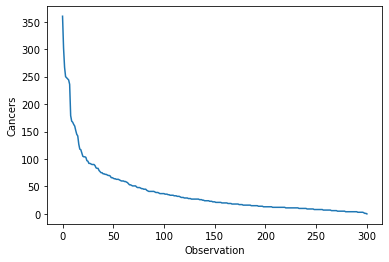

In [10]:
# visualising the data, sorting the number of cases into ascending order
# we can see that there are few observations with high cancer rates and many observations with few cancer rates

plt.plot(sorted(cancer)[::-1])
plt.xlabel('Observation')
plt.ylabel('Cancers')

Text(0, 0.5, 'Frequency of Observations')

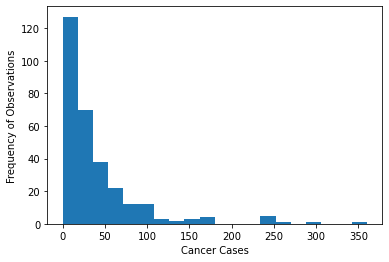

In [12]:
# plotting the data as a histogram (sorting the data into bins of discrete intervals)
plt.hist(dataf['cancer'], bins = 20);
plt.xlabel('Cancer Cases')
plt.ylabel('Frequency of Observations')

In [15]:
# looks like exponential decay. An exponential function's decay is government by the rate parameter (λ)
# The maximum likelihood algorthim tries to estimate the value of λ that maximises the probability of observing data in an
# eponential data distribution

# we know that the rate of decay parameter is related to the inverse of the mean
# C_mean (number of days of survival) is an exponential random variable with the parameter λ,
# and the observations ci are sampled from this distribution. Let the sample mean be:
# C_mean = 1/n * Σci

C_mean = cancer.mean()
lambda_param = 1 / C_mean

In [16]:
# now lets compare the exponential distribution to the actual data.

# first we need to scale the exponential function
C_max = cancer.max() # maximum number of cancer cases in any histogram bin.
cancer_cases = np.linspace(0., C_max, 301)

In [17]:
# now find the Probability Density Function of this distribution by passing the observations
# then passing it to the scale of the inverse of the lambda parameter

In [19]:
expo_dist = st.expon.pdf(cancer_cases, scale=1. / lambda_param)

Text(0, 0.5, 'Frequency of Observations')

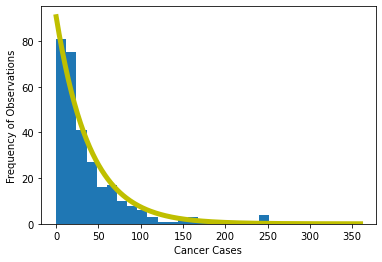

In [21]:
# plotting the 2 graphs together making a duel axis chart

fig, ax = plt.subplots(1, 1, figsize=(6, 4)) # allowing us to plot graphs over each other
ax.hist(cancer, bins = 30) # plots the histogram
ax.plot(cancer_cases, expo_dist * len(cancer) * C_max / 30, '-y', lw = 5) # '-y' = yellow, 'lw' = line width
ax.set_xlabel('Cancer Cases')
ax.set_ylabel('Frequency of Observations')

In [23]:
# it looks like a good fit, but we need a measure of how good the estimation was.
# to do this we can use a different SciPy method that calculates the best exponential fit

expo_dist = st.expon # getting statsmodel library (st) to provide an exponential curve
arguments = expo_dist.fit(cancer) # fit our cancer data to that curve to see how good a fit it is
arguments

(0.0, 39.857142857142854)

In [25]:
# with these arguments we can pass them to the Kolmogorov-Smirnov test. This will tell us how
# well our chosen distribution type (exponential in this case) fits the actual data

st.kstest(cancer, expo_dist.cdf, arguments)

KstestResult(statistic=0.08878213963828058, pvalue=0.016307682030042146)

In [26]:
# when using the KS test, we usually set up a null hypothesis that states that the fitted distribution is a good fit
# but here we can see that the p-value is sub 0.05 (5%) and therefore we must reject the null hypothesis
# the exponential distribution is not a good fit for our data even though it looks as if it is from the visualisations

In [27]:
# Now we know that the distribution is not exponential
# Another type of distribution that is used in calculating lifetime is called the 'Birnbaum-Sanders distribution'
fLife_dist = st.fatiguelife
arg = fLife_dist.fit(cancer)
st.kstest(cancer, fLife_dist.cdf, arg)

KstestResult(statistic=0.0490929303676384, pvalue=0.44850612100977694)

Text(0, 0.5, 'Observations')

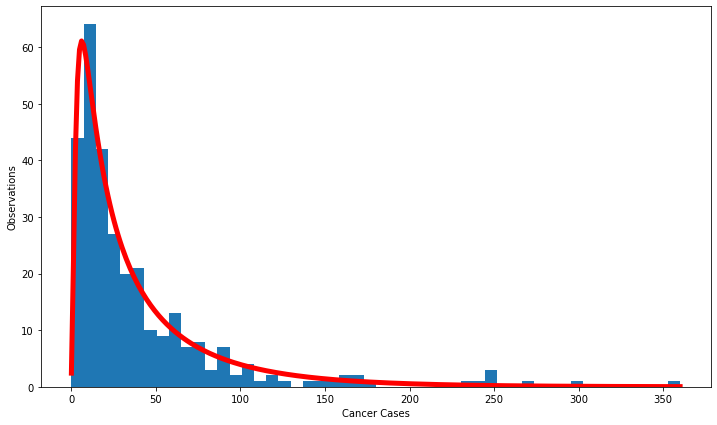

In [30]:
# we can see the P value here is above 0.05 (5%) so we can accept the null hypothesis that this distribution
# (Birnbaum-Sanders distribution) is a good fit for our data.
# let's visualise it too
fatLife_dist = fLife_dist.pdf(cancer_cases, *arg)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(cancer, bins = 50)
ax.plot(cancer_cases, fatLife_dist * len(cancer) * C_max / 50, '-r', lw = 5, label = 'FLife')
ax.set_xlabel('Cancer Cases')
ax.set_ylabel('Observations')